connect duckdb

In [35]:
import duckdb

conn = duckdb.connect("sakila.duckdb")

# determine the maximum number of rows DuckDB will..
# sample from a Pandas DataFrame when automatically analyzing its schema
conn.sql("SET pandas_analyze_sample=100000;")

a) Which movies are longer than 3 hours (180 minutes), show the title and its length?

In [36]:
longer_than_3_hour = conn.sql("""

select 
    title, 
    length 
from staging.film
where length > 180
        """).df()

longer_than_3_hour['title'] = longer_than_3_hour['title'].str.title()

# lägger till en header/rubrik med style.setcaption
longer_than_3_hour.style.set_caption("Movies longer than 3 hours").set_table_styles([
    
    {
        "selector": "caption", # sätter att jag vill styla caption (som är rubrik) 
        "props": [ # detta är css-reglerna för min styling - en lista med tuples 
            
            ("font-family", "Arial"),
            ("font-size", "Arial"),
            ("font-size", "20px"),
            ("font-weight", "bold"),
            ("margin-bottom", "5px")
        ] 
    }
])


,title,length
0,Analyze Hoosiers,181
1,Baked Cleopatra,182
2,Catch Amistad,183
3,Chicago North,185
4,Conspiracy Spirit,184
5,Control Anthem,185
6,Crystal Breaking,184
7,Darn Forrester,185
8,Frontier Cabin,183
9,Gangs Pride,185


b) Which movies have the word "love" in its title?
 
Show the following columns, title ,rating length, description

In [37]:
conn.sql(""" --sql

select
    title,
    rating,
    length, 
    description
    
    from staging.film
    where regexp_matches(title, 'love')
    
;
""").df()

,title,rating,length,description


c) Calculate descriptive statistics on the length column, 

The Manager wants, shortest, average, median and
longest movie length

In [38]:
conn.sql(""" 
         --sql
         select
            min(length) as shortest_movie_min,
            avg(length) as average_length_of_all_movies_min,
            median(length) as median_length_of_all_movies_min,
            max(length) as longest_movie_min
             
            
         from staging.film
         """).df()

,shortest_movie_min,average_length_of_all_movies_min,median_length_of_all_movies_min,longest_movie_min
0,46,115.272,114.0,185


d) The rental rate is the cost to rent a movie and the rental duration is the number of days a customer can keep the movie.

 The Manager wants to know the 10 most expensive movies to rent per day.


https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

In [39]:

ten_exp_movie = conn.sql(""" --sql
         
    select
        title,
        rental_rate/rental_duration as cost_per_day_usd
            
    from staging.film
    order by cost_per_day_usd desc
    limit 10

        """).df()

# snyggar upp titlarna med funktionen .str.title() och sparar tillbaka ändringen till kolumnen

ten_exp_movie['title'] = ten_exp_movie['title'].str.title()

# lägger till en titel med style.setcaption
ten_exp_movie.style.set_caption("10 most expensive movies").set_table_styles([
    
    {
     "selector": "caption", ## sätter vad jag vill styla, i detta fallet caption = rubrik 
     "props": [ # CSS-reglerna 
         ("font-family", "Arial"),
         ("font-size", "20px"),
         ("font-weight", "bold"),
         ("margin-bottom", "5px")
         ]
    }
    ])

,title,cost_per_day_usd
0,Ace Goldfinger,1.663333
1,American Circus,1.663333
2,Autumn Crow,1.663333
3,Backlash Undefeated,1.663333
4,Beast Hunchback,1.663333
5,Behavior Runaway,1.663333
6,Bilko Anonymous,1.663333
7,Caribbean Liberty,1.663333
8,Casper Dragonfly,1.663333
9,Casualties Encino,1.663333


e) Which actors have played in most movies?
 
Show the top 10 actors with the number of movies they have
played in

In [53]:
actor_vs_movies = conn.sql(""" --sql

select 
    first_name, 
    last_name,
    count(*) as amount_of_movies

from staging.film

inner join
    staging.film_actor on film.film_id = film_actor.film_id

inner join 
    staging.actor on actor.actor_id = film_actor.actor_id

group by actor.actor_id, first_name, last_name
order by amount_of_movies desc
limit 10

;
""").df()

actor_vs_movies['first_name'] = actor_vs_movies['first_name'].str.title()
actor_vs_movies['last_name'] = actor_vs_movies['last_name'].str.title()
actor_vs_movies.style.set_caption("Top 10 actors").set_table_styles(
    
    [
    
    {
        "selector": "caption",
        "props": [
            ("font-family", "Arial"),
            ("font-size", "20px"),
            ("font-weight", "bold"),
            ("margin-bottom", "5px")
        ]
    }
    ]
)


,first_name,last_name,amount_of_movies
0,Gina,Degeneres,42
1,Walter,Torn,41
2,Mary,Keitel,40
3,Matthew,Carrey,39
4,Sandra,Kilmer,37
5,Scarlett,Damon,36
6,Val,Bolger,35
7,Angela,Witherspoon,35
8,Groucho,Dunst,35
9,Henry,Berry,35


f) Now it's time for you to choose your own question

 to explore the sakila database! Write down 3-5
 
 questions you want to answer and then answer them using pandas and duckdb.



f1) which 10 movies have the highest rental_rate?

(Show title and rental_rate)

In [41]:
highest_rental = conn.sql("""
--sql
    select title, rental_rate
    from staging.film 
    order by rental_rate desc
    limit 10
;
""").df()

highest_rental['title'] = highest_rental['title'].str.title() 
highest_rental.style.set_caption("Movies with highest rental rate").set_table_styles(
                
    [
        
    {
        "selector": "caption",
        "props": [
            ("font-family", "Arial"),
            ("font-size", "20px"),
            ("font-weight", "bold"),
            ("margin-bottom", "5px")
        ]
            
    }
        
    ]
)

,title,rental_rate
0,Ace Goldfinger,4.990000
1,Airplane Sierra,4.990000
2,Airport Pollock,4.990000
3,Aladdin Calendar,4.990000
4,Ali Forever,4.990000
5,Amelie Hellfighters,4.990000
6,American Circus,4.990000
7,Anthem Luke,4.990000
8,Apache Divine,4.990000
9,Apocalypse Flamingos,4.990000


f2) How many movies are in each category?

(Show category name and number of movies)

In [42]:
movies_per_category = conn.sql("""
--sql
    select name as 'category name', count(*) as "number of movies"
    
    from staging.film
    
    inner join
        staging.film_category on film.film_id = film_category.film_id
    
    inner join  
        staging.category on film_category.category_id = category.category_id 
        
    group by category.name
    
    order by "number of movies" desc
;
""").df()

movies_per_category.style.set_caption("Movies per category").set_table_styles(
    
    [
        
        {
            "selector": "caption",
            "props": [
                ("font-family", "Arial"),
                ("font-size", "20px"),
                ("font-weight", "bold"),
                ("margin-bottom", "5px")
            ]
        }
    
])



,category name,number of movies
0,Sports,74
1,Foreign,73
2,Family,69
3,Documentary,68
4,Animation,66
5,Action,64
6,New,63
7,Drama,62
8,Sci-Fi,61
9,Games,61


f3) Which customers have made the most rentals?

(Show customer name and rental count)

In [57]:
most_active_renters = conn.sql("""
--sql
    select 
        customer.first_name,
        customer.last_name,
        count(*) as amount_of_rental
    
    from staging.customer
    
    inner join 
        staging.rental on customer.customer_id = rental.customer_id
     
    group by
        customer.customer_id,
        customer.first_name,
        customer.last_name
    
    order by amount_of_rental desc
    
    limit 10
;
""").df()

most_active_renters['first_name'] = most_active_renters['first_name'].str.title()

most_active_renters['last_name'] = most_active_renters['last_name'].str.title()

most_active_renters.style.set_caption("Most active renters").set_table_styles(
    
    [
        
        {
            "selector": "caption",
            "props": [
                ("font-family", "Arial"),
                ("font-size", "20px"),
                ("font-weight", "bold"),
                ("margin-bottom", "5px")
            ]
        }
    ]
    )

,first_name,last_name,amount_of_rental
0,Eleanor,Hunt,46
1,Karl,Seal,45
2,Marcia,Dean,42
3,Clara,Shaw,42
4,Tammy,Sanders,41
5,Wesley,Bull,40
6,Sue,Peters,40
7,Marion,Snyder,39
8,Rhonda,Kennedy,39
9,Tim,Cary,39


f4) Which movies have the longest rental_duration?

(Show title and rental_duration)

In [44]:
rental_duration_df = conn.sql("""
--sql
    select title, rental_duration
    
    from staging.film
    order by rental_duration desc
    
    limit 10
;
""").df()

rental_duration_df['title'] = rental_duration_df['title'].str.title()

rental_duration_df.style.set_caption("Top Movies by Rental Duration").set_table_styles(
    [
        {
            "selector": "caption",
            "props": [
                
                ("font-family", "Arial"),
                ("font-size", "20px"),
                ("font-weight", "bold"),
                ("margin-bottom", "5px") 
            ]
        }
    ])

,title,rental_duration
0,Adaptation Holes,7
1,Anonymous Human,7
2,Argonauts Town,7
3,Bikini Borrowers,7
4,Blackout Private,7
5,Blanket Beverly,7
6,Boiled Dares,7
7,Boondock Ballroom,7
8,Born Spinal,7
9,Borrowers Bedazzled,7


f5) Which cities have the most customers?

show city and amount of customers

In [45]:
customers_by_city = conn.sql(""" --sql
               
select city, count(*) as amount_of_customer

from staging.customer

inner join
    staging.address on customer.address_id = address.address_id
    
inner join 
    staging.city on address.city_id = city.city_id
    
group by city 

order by amount_of_customer desc
limit 20
;
""").df()

customers_by_city.style.set_caption("Cities Ranked by Number of Customers").set_table_styles(
    [
        {
            
            "selector": "caption",
            "props": [
                
                ("font-family", "Arial"),
                ("font-size", "20px"),
                ("font-weight", "bold"),
                ("margin-bottom", "5px")
            ]
            
        }
    
])


,city,amount_of_customer
0,London,2
1,Aurora,2
2,Adana,1
3,Ambattur,1
4,Balaiha,1
5,Atinsk,1
6,al-Hawiya,1
7,Benguela,1
8,Antofagasta,1
9,Callao,1


### task 2 - graphs

##### a) Who are our top 5 customers by total spend? 
##### The Manager wants to know so that they can reward them with special offers.
##### Create a bar chart showing the top 5 customers by total spend.

In [66]:
# part 1, skriva själva queryn

import pandas as pd

top5 = conn.sql("""--sql
         
    select 
        -- customer.customer_id,
        first_name,
        sum(amount) as total_spent
        
    from
        staging.payment
    
    inner join 
        staging.customer on payment.customer_id = customer.customer_id
        
   
    group by customer.customer_id, first_name
    
    order by total_spent desc
    
    limit 5
  
;
""").df()


top5['first_name'] = top5['first_name'].str.title()

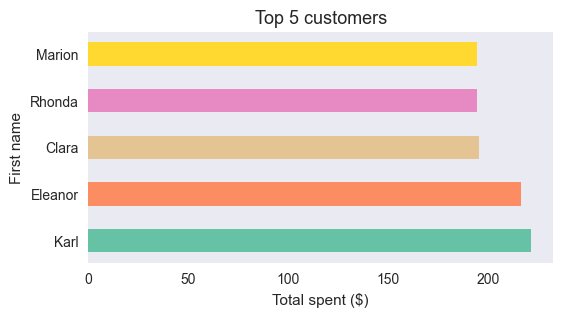

In [67]:
# part 2 - skriva koden för att visualisera

import matplotlib.pyplot as plt

# skapar en lista med färger
color_list = ["#66c2a5", "#fc8d62", "#e5c494",  "#e78ac3", "#ffd92f"]

# aktiverar seaborn-temat för snyggare färger och layout
plt.style.use("seaborn-v0_8") 

# här delar jag upp dataframen, så det blir två serier
first_name = top5['first_name']
total_spent = top5['total_spent']

fig, ax = plt.subplots(figsize=(6,3))

ax.grid(False)

# ritar ett horisontellt stapeldiagram
ax.barh(first_name, total_spent,  linewidth=0.5, color = color_list, height=0.5)

ax.set_title("Top 5 customers", fontsize=13)
ax.set_xlabel('Total spent ($)', fontsize=11, fontweight="normal")
ax.set_ylabel('First name', fontsize=11, fontweight="normal")
plt.show()


b) How much money does each film category bring in?

Make a bar chart showing total revenue per film category.

In [48]:
total_revenue = conn.sql("""        
--sql

select 
    name as category,
    sum(payment.amount) as total_amount_usd

from staging.category

inner join 
    staging.film_category on category.category_id = film_category.category_id
    
inner join
    staging.film on film.film_id = film_category.film_id

inner join
    staging.inventory on film.film_id = inventory.film_id
    
inner join
    staging.rental on inventory.inventory_id = rental.inventory_id
    
inner join
    staging.payment on rental.rental_id = payment.rental_id
    
group by name

order by "total_amount_usd" desc
;
""").df()


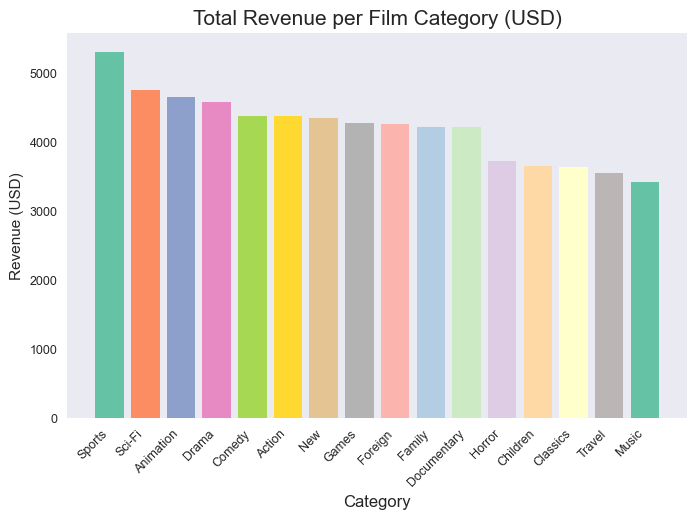

In [49]:
# skapar en lista med färger

color_list = [
    "#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854",
    "#ffd92f", "#e5c494", "#b3b3b3", "#fbb4ae", "#b3cde3",
    "#ccebc5", "#decbe4", "#fed9a6", "#ffffcc", "#bcb5b5"    
]

# här delar jag upp dataframen, så det blir två serier
category = total_revenue['category']
total_amount_usd = total_revenue['total_amount_usd']

fig, ax = plt.subplots(figsize=(8,5))

ax.grid(False)
position = range(len(category))
ax.bar(position, total_amount_usd, linewidth=0.5, color = color_list)

ax.set_xticks(position)

ax.set_xticklabels(category)

labels = ax.get_xticklabels()

ax.tick_params(axis="y", labelsize=9)
ax.tick_params(axis="x", rotation=45, labelsize=9)

ax.set_title("Total Revenue per Film Category (USD)", fontsize=15)
ax.set_xlabel("Category", fontsize=12)
ax.set_ylabel("Revenue (USD)")
      
for label in labels:
    
      x_pos = label.get_position()[0] # hämta x-positionen på labeln för finjustering
      
      label.set_ha("right") # högerjusterar alla labels för att undvika att dom koliderar
    